Es un algoritmo de prediccion supervisado. 

 ### Entropia

$H(s) = \sum_{i}^{N} -p_{i} log_{2}(p_{i})$

Esta es nula 0, cuando el numero de categorias es homogenea 

### Ganancia de informacion 

### Algoritmo ID3

1) Se calcula la entropia inicial del sistema basandose en la variable objetivo a predecir

2) Se calcula la ganancia de informacion para cada varibale candidata para un nodo. Se selecciona la variable que aporte la maxima ganancia de informacion como nodo de decision.

3) Repetir el paso 2 para cada rama de cada nodo. El nuevo nodo identificado es una hoja.

4) Se comprueba si el nodo hoja clasifica correctamente todos los datos. Si es asi, se para en esta rama. Si no es asi, se vuelve al paso 2 y se itera para ramificarlo. 

Ademas de ID3 existen: 
* Indice de Gini(la variable objetivo es binaria)
* Detector automatico de la interacion con Chi cuadrado (CHAID)
* Reduccion de la varianza(Gestionar una variable objetivo numerica continua) 

### La poda del arbol

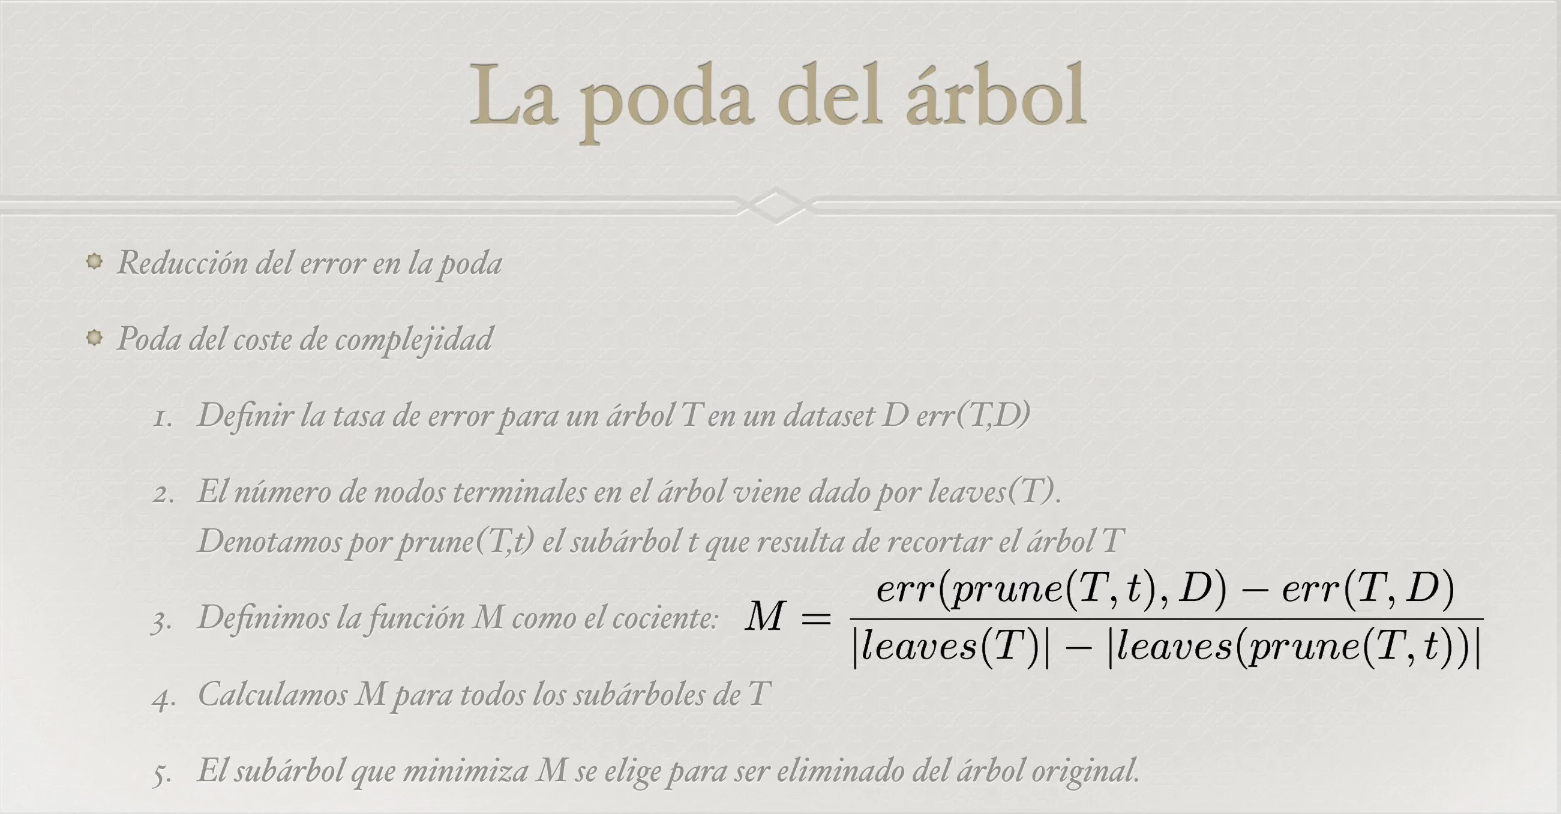

### Los problemas de los arboles 

* Los valores numericos continuos --> Hay que encontrar umbrales optimos de corte para convertirlo en categorias.

Solucion a este problema: Se puede comparar con una variable categorica y luego ordenar los valores numericos de forma ascendente y luego encontrar los valores donde se cambia de categoria de la otra variable. Finalmente para mejorar el corte se puede calcular el punto medio entre el limite de una categoria y la siguiente. 


* Los NA's 

Se suele asignar el valor mas frecuente de la columna. No es tan optima solucion
Se puede asignar el valor mas frecuente de la columna de la misma clase de la variable de decision de la falten valores. 

## Arbol de decision para especies de flores 

In [1]:
from IPython .core. interactiveshell import InteractiveShell  # todas las salidas
InteractiveShell . ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

(150, 5)

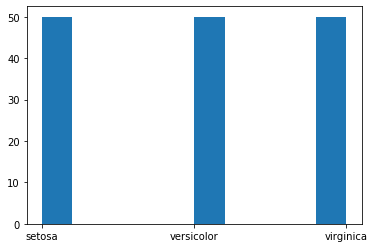

In [4]:
mainpath = "C://Users/lgces/Documents/GitHub/python-ml-course/datasets/"
df = pd.read_csv(mainpath+'iris/iris.csv', sep=',')
df.head(2)
plt.hist(df.Species)
df.shape

In [4]:
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
colnames = df.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]
df['istrain']= np.random.uniform(0,1, len(df))<=0.75

In [6]:
#df.drop('is_train', axis=1)

In [6]:
df.head(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,istrain
0,5.1,3.5,1.4,0.2,setosa,True


In [7]:
df.istrain

0       True
1       True
2       True
3      False
4      False
       ...  
145     True
146     True
147    False
148     True
149     True
Name: istrain, Length: 150, dtype: bool

In [11]:
train, test = df[df['istrain']==True], df[df['istrain']==False]

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=20, random_state=99 )
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [20]:
preds = tree.predict(test[predictors])
pd.crosstab(test[target], preds, rownames=['Actual'], colnames=['Predictions'])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,8,0,0
versicolor,0,14,1
virginica,0,2,12


### Visualizacion del arbol de decision 

In [21]:
from sklearn.tree import export_graphviz
#with open('C://Users/lgces/Documents/GitHub/python-ml-course/resources/iris_dtree.dot','w') as dotfile:
    #export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    #dotfile.close()
    

In [4]:
import os
from graphviz import Source

In [2]:
file = open('C://Users/lgces/Documents/GitHub/python-ml-course/resources/iris_dtree.dot','r')
text = file.read()
text 


'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.6\\nentropy = 1.585\\nsamples = 116\\nvalue = [38, 39, 39]"] ;\n1 [label="entropy = 0.0\\nsamples = 38\\nvalue = [38, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 1.0\\nsamples = 78\\nvalue = [0, 39, 39]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 4.95\\nentropy = 0.519\\nsamples = 43\\nvalue = [0, 38, 5]"] ;\n2 -> 3 ;\n4 [label="Petal.Width <= 1.65\\nentropy = 0.179\\nsamples = 37\\nvalue = [0, 36, 1]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 36\\nvalue = [0, 36, 0]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n4 -> 6 ;\n7 [label="entropy = 0.918\\nsamples = 6\\nvalue = [0, 2, 4]"] ;\n3 -> 7 ;\n8 [label="Petal.Length <= 4.85\\nentropy = 0.187\\nsamples = 35\\nvalue = [0, 1, 34]"] ;\n2 -> 8 ;\n9 [label="entropy = 1.0\\nsamples = 2\\nvalue = [0, 1, 1]"] ;\n8 -> 

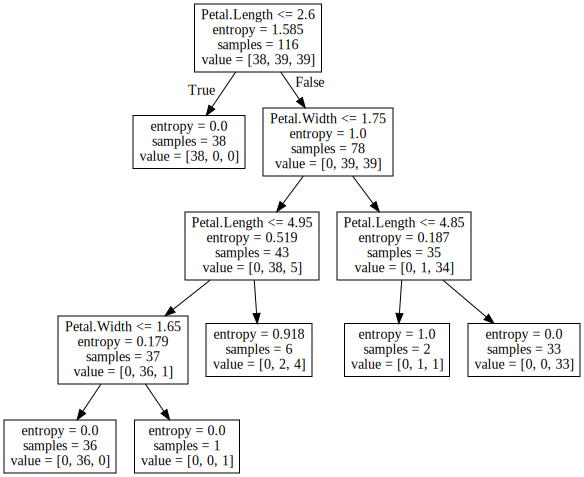

In [6]:
Source(text)

## Validacion cruzada para la poda de un arbol de clasificacion

In [13]:
x = df[predictors]
y = df[target]


In [22]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20, random_state=99)
tree.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [39]:
# sklearn.cross_validation ya no, ahora es sklearn.model_selection
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=True, random_state=1)
cv
for train_index, test_index in cv.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    #X_train, X_test = x[train_index], x[test_index]
    #y_train, y_test = y[train_index], y[test_index]

#for train, test in cv.split(x):
    
    #print("%s %s" % (train, test))

KFold(n_splits=10, random_state=1, shuffle=True)

TRAIN: [  0   1   2   3   4   6   7   8   9  10  11  12  13  15  17  18  19  20
  21  22  23  24  25  26  27  28  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  45  46  47  48  49  50  52  53  54  55  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  76  77  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  95  96  97  99 100
 101 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 121 122 123 124 125 126 127 128 129 130 132 133 134 135 136 137 138 139
 140 142 143 144 145 146 147 148 149] TEST: [  5  14  16  29  44  51  56  75  78  94  98 102 120 131 141]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  20  21  22  23  24  25  26  27  28  29  30  32  34  36  37  38  39
  41  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  67  68  69  70  71  72  74  75  76  78  79  80
  81  82  83  85  86  87  88  89  91  93  94  95  96  97  98 100 101 102
 103

In [40]:
from sklearn.model_selection import cross_val_score 

In [44]:
scores = cross_val_score(tree, x,y, scoring='accuracy', cv=cv, n_jobs=1)
score = np.mean(scores)
score

0.9333333333333333

In [49]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i, min_samples_split=20, random_state=99).fit(x,y)
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = cross_val_score(tree, x,y, scoring='accuracy', cv=cv, n_jobs=1)
    score = np.mean(scores)
    print('Score para i=',i,'es de ',score)
    print('  ', tree.feature_importances_)
#si se elige con i=3 lo que puede crecer el arbol optimo. 


Score para i= 1 es de  0.5666666666666667
   [0. 0. 1. 0.]
Score para i= 2 es de  0.9200000000000002
   [0.         0.         0.66620285 0.33379715]
Score para i= 3 es de  0.9400000000000001
   [0.         0.         0.68976981 0.31023019]
Score para i= 4 es de  0.9333333333333333
   [0.         0.         0.66869158 0.33130842]
Score para i= 5 es de  0.9333333333333333
   [0.         0.         0.66869158 0.33130842]
Score para i= 6 es de  0.9333333333333333
   [0.         0.         0.66869158 0.33130842]
Score para i= 7 es de  0.9333333333333333
   [0.         0.         0.66869158 0.33130842]
Score para i= 8 es de  0.9333333333333333
   [0.         0.         0.66869158 0.33130842]
Score para i= 9 es de  0.9333333333333333
   [0.         0.         0.66869158 0.33130842]
Score para i= 10 es de  0.9333333333333333
   [0.         0.         0.66869158 0.33130842]


In [50]:
predictors
#De las 4 variables la mas importante es la longitud del petalo y la segunda mas importante seria la anchura del petalo. 

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

## Arbol de regresion

* La variable objetivo es nuemrica continua
* Util cuando hay multiples relaciones entre variables mas complejo que una regresion lineal o logistica. 
* El criterio de subdivision es la maxima reduccion de la varianza. 
* El max profundida sera el medidor de eficiencia del arbol de regresion 
* Ventajas:
    * Modela relaciones complejas no lineales
    * Facil de entender 
    * Aunque falten valores se puede promediar en el ultimo nodo donde se ha clasificado la observacion
    * Permite seleccionar rasgos descriptivos importantes del dataset

### Dataset de las casas de Boston y Kaggle

In [52]:
data = pd.read_csv(mainpath+'boston/Boston.csv', sep=',')
data 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [105]:
colnames = data.columns.values.tolist()
predictors = colnames[:13]
target = colnames[13]
X = data[predictors]
Y = data[target]


In [54]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
regtree = DecisionTreeRegressor(min_samples_split=30, max_depth= 5, min_samples_leaf=10, random_state=0)
regtree.fit(X,Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=30,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [72]:
preds = regtree.predict(data[predictors])

In [73]:
data['preds'] = preds

In [74]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,preds
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,23.787500
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,23.787500
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,35.247826
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,35.247826
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,35.247826


In [75]:
data[['preds', 'medv']]

,preds,medv
0,23.787500,24.0
1,23.787500,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
...,...,...
501,23.787500,22.4
502,23.787500,20.6
503,28.978261,23.9
504,31.170000,22.0


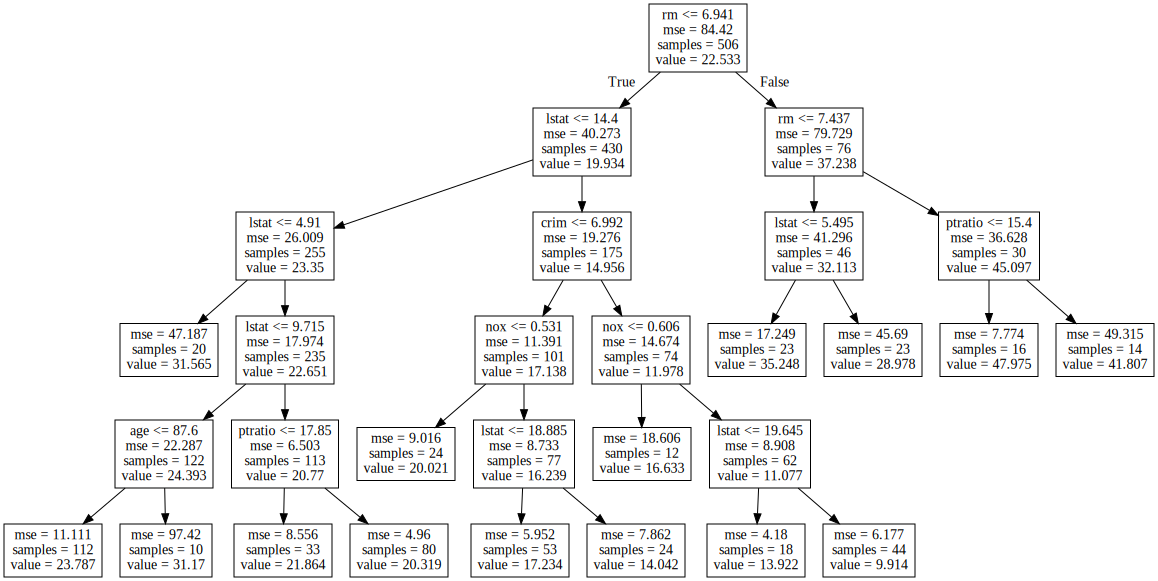

In [76]:
with open('C://Users/lgces/Documents/GitHub/python-ml-course/resources/boston_rtree.dot','w') as dotfile:
    export_graphviz(regtree, out_file=dotfile, feature_names=predictors)
    dotfile.close()
    
file = open('C://Users/lgces/Documents/GitHub/python-ml-course/resources/boston_rtree.dot','r')
text = file.read()
Source(text) 

In [77]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = -cross_val_score(regtree, X,Y, scoring='neg_mean_squared_error' , cv=cv, n_jobs=1)
print(scores)
score = np.mean(scores)
print(score)

[14.21501779 16.62018743 18.48312343 46.22608214 10.25202434 18.39546877
 15.08005674 32.23929702 23.04375075 10.93761052]
20.54926189262014


In [78]:
list(zip(predictors, regtree.feature_importances_))

[('crim', 0.032184533425691254),
 ('zn', 0.0),
 ('indus', 0.0),
 ('chas', 0.0),
 ('nox', 0.016195328299152056),
 ('rm', 0.6341876193016562),
 ('age', 0.014165271650613091),
 ('dis', 0.0),
 ('rad', 0.0),
 ('tax', 0.0),
 ('ptratio', 0.009620458196377114),
 ('black', 0.0),
 ('lstat', 0.2936467891265104)]

### Random forest

* Algoritmo predictivo de aprendizaje de ML

* El metodo de promedio: se crean varios modelos similares e independientes y se hace un promedio de las predicciones de cada modelo. 
* El metodo de impulso: reducir el sesgo del estimador combinado construyendolo de forma secuencial de los estimadores base. Asi se consigue un modelo mas robusto a partir de varios mas debiles. 

* Es una coleccion de arboles de clasificacion y regresion.
* No necesita validacion cruzada. Utiliza el metodo de boseo(bagging) 

In [79]:
from sklearn.ensemble import RandomForestRegressor


In [98]:
forest = RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=500)
#n_estimador es el numero de arboles que tendra nuestro bosque 
#n_jobs es el numero de tareas que se ejecutaran en paralelo para predecir como para clasificar 
#oob_score es un muestreo para hacer las predicciones
forest.fit(X,Y)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=2, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [99]:
data['rforest_pred'] = forest.oob_prediction_
data[['rforest_pred', 'medv', 'preds']]

,rforest_pred,medv,preds
0,28.097647,24.0,23.787500
1,22.465217,21.6,23.787500
2,34.290196,34.7,35.247826
3,34.274457,33.4,35.247826
4,34.164062,36.2,35.247826
...,...,...,...
501,24.044792,22.4,23.787500
502,18.538150,20.6,23.787500
503,27.538830,23.9,28.978261
504,25.992350,22.0,31.170000


In [100]:
data['rforest_error2'] = (data['rforest_pred']- data['medv'])**2

In [101]:
sum(data['rforest_error2'])/len(data)

10.504234024375723

In [102]:
forest.oob_score_

0.8755710820731608

### Random forest classifiers

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
#Utilizando iris.csv
train, test = df[df['istrain']==True], df[df['istrain']==False]
colnames = df.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=1000)
forest.fit(train[predictors], train[target])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=2, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [116]:
forest.oob_decision_function_
forest.oob_score_

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.99717514, 0.00282486, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.96153846, 0.03846154, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.96089385, 0.03910615, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.9972752 , 0.0027248 , 0.        ],
       [1.

0.9557522123893806

### Algunos parametros importantes de los bosques aleatorios 

* El tamano del nodo (min_sample_leaf)
* El numero de arboles (n_estimatos)se usan 500
* El numero de predictores muestreados: se establece entre un rango de 2 a 5. 


* Maximizan la reduccion de la varianza